## IS-4100: Web Scraping NFL Draft Data

## Overview:
In this lab, you will learn how to gather NFL draft and scouting data from various websites through web scraping, perform exploratory data analysis (EDA), and build a machine learning model to predict player success in the NFL. You will use **Python / R**, with libraries such as **BeautifulSoup**, **RSelenium**, and **requests** for scraping, **pandas** (Python) or **dplyr** and **tidyverse** (R) for data manipulation, and **scikit-learn** (Python) or **caret** (R) for model building.

## Objectives:
- Learn web scraping techniques using Python or R.
- Perform exploratory data analysis (EDA) on NFL draft data.
- Build a predictive model to analyze draft data and predict player success (e.g., Pro Bowl appearances, number of career games, or player performance ratings).
- Evaluate the model's performance and analyze its implications.

## Instructions:

### Part 1: Web Scraping NFL Draft Data
**Task**: Write a script to scrape NFL draft data. You may use Python or R for this task. Suggested websites include:
- Pro Football Reference (NFL Draft)
- NFL Scouting Data

**For Python**:
- Use libraries such as `BeautifulSoup`, `requests`, and `lxml`.
- Example: Scraping player data using `BeautifulSoup` and cleaning it with `pandas`.

**For R**:
- Use libraries such as `rvest`, `RSelenium`, and `xml2`.
- Example: Scraping player data with `rvest` and cleaning it with `dplyr`.

You are expected to scrape the following information for at least one NFL draft year:
- Player name
- Position
- College
- Draft round and pick number
- NFL team

**Deliverables**:
- A cleaned `pandas` DataFrame (Python) or a cleaned `tibble` (R) containing the scraped data.
- Save the data to a `.csv` file for further analysis.

### Part 2: Exploratory Data Analysis (EDA)
**Task**: Perform an EDA on the scraped NFL draft data. Analyze the following:
- Distribution of players by position.
- Number of players drafted by round.
- Success metrics like Pro Bowl appearances, number of games played, or All-Pro selections (if available).

**Questions to Explore**:
- Are certain positions more frequently drafted in the early rounds?
- Which colleges or conferences have the highest number of players drafted?

**For Python**:
- Use `pandas` and `matplotlib` or `seaborn` for visualizations.

**For R**:
- Use `ggplot2` for visualizations and `dplyr` for data manipulation.

**Deliverables**:
- Visualizations (bar charts, histograms, etc.) of your findings.
- Summary statistics (mean, median, mode) for key variables like draft round and "career value".

### Part 3: Predictive Modeling
**Task**: Build a machine learning model to predict player success based on draft data. You may use either Python or R for model building.

- **For Python**:
  - Use `scikit-learn` for model building and evaluation.
  
- **For R**:
  - Use `caret` for model building and evaluation.

**Steps**:
1. Split the data into training and testing sets.
2. Choose an appropriate model (e.g., logistic regression, decision tree, random forest).
3. Train the model and evaluate its performance using appropriate metrics such as accuracy, precision, and recall.

**Deliverables**:
- Model training and evaluation code.
- A brief explanation of the model's performance and potential ways to improve it.

### Part 4: Analysis and Discussion
**Task**: Analyze the results of your model and discuss the implications. Consider the following:
- What features were most important in predicting success?
- How could the model be improved (e.g., by gathering more data or using more advanced techniques)?
- Discuss potential biases in the data (e.g., players from larger schools being favored) and how they might affect the model.

**Deliverables**:
- A short report (2-3 paragraphs) summarizing your analysis and reflections on the results.


## Set Up

In [ ]:
install.packages("rvest")
install.packages("tidyverse")
install.packages("janitor")
install.packages('readr')
install.packages('gridExtra')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(rvest)
library(tidyverse)
library(janitor)
library(readr)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()         masks stats::filter()
✖ readr::guess_encoding() masks rvest::guess_encoding()
✖ dplyr::lag()            masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




## Web Scraping


In [ ]:
# Initialize an empty string for the url
url <- ""

draft <- tibble()

# Use for loop to iterate through desired years
for (i in seq(2000, 2022)) {
  url <- paste0(
    'https://www.pro-football-reference.com/years/',
    i,
    '/draft.htm'
  )

  web_data <-
    read_html(url) |>
    html_nodes(xpath = '//*[@id="drafts"]') |>    # Scrape from table with id = drafts
    html_table()

  web_df <- web_data[[1]]

  # clean the df
  web_df_clean <-
    web_df |>
      janitor::row_to_names(row_number = 1) |>
      janitor::clean_names(case = 'none') |>
      mutate(Season = i) |>
      filter(Tm != 'Tm')

  draft <- bind_rows(draft, web_df_clean)
}

Warning message:
“Row 1 does not provide unique names. Consider running clean_names() after row_to_names().”
Warning message:
“Row 1 does not provide unique names. Consider running clean_names() after row_to_names().”
Warning message:
“Row 1 does not provide unique names. Consider running clean_names() after row_to_names().”
Warning message:
“Row 1 does not provide unique names. Consider running clean_names() after row_to_names().”
Warning message:
“Row 1 does not provide unique names. Consider running clean_names() after row_to_names().”
Warning message:
“Row 1 does not provide unique names. Consider running clean_names() after row_to_names().”
Warning message:
“Row 1 does not provide unique names. Consider running clean_names() after row_to_names().”
Warning message:
“Row 1 does not provide unique names. Consider running clean_names() after row_to_names().”
Warning message:
“Row 1 does not provide unique names. Consider running clean_names() after row_to_names().”
Warning message:
“R

In [ ]:
# Clean Some of the Teams with Name changes
draft <- draft |>
    select(Season, Rnd, Pick, Tm, Player, Age, Pos, AP1, PB, wAV, DrAV, College_Univ) |>      # Select only these fields
    mutate(
      Tm = case_when(
        Tm == 'SDG' ~ 'LAC',
        Tm == 'OAK' ~ 'LVR',
        Tm == 'STL' ~ 'LAR',
        TRUE ~ Tm
      ),
      wAV = ifelse(is.na(wAV), 0, wAV),
      DrAV = ifelse(is.na(DrAV), 0, DrAV)
    )

In [ ]:
# Type Casting
draft_pre2016 <-
  draft |>
    mutate(
      DrAV = as.numeric(DrAV),
      wAV = as.numeric(wAV),
      Pick = as.integer(Pick)
    ) |>
    filter(Season <= 2016)

Let's only look at picks made in 2016 or before so that these players have had enough time in the league.

In [ ]:
# Calculate the average wAV and DrAV for each position group
avg_position_val <- draft_pre2016 |>
  group_by(Pos) |>
  summarize(
    Avg_Career_Val = mean(wAV, na.rm = TRUE),
    Median_Career_Val = median(wAV, na.rm = TRUE),
    SD_Career_Val = sd(wAV, na.rm = TRUE)
  )

avg_position_val

Pos,Avg_Career_Val,Median_Career_Val,SD_Career_Val
<chr>,<dbl>,<dbl>,<dbl>
C,27.477778,21.5,24.032388
CB,14.298246,8.0,16.863914
DB,16.248580,9.0,18.440381
DE,23.017192,14.0,24.788641
DL,0.000000,0.0,NA
DT,20.292453,13.0,22.114971
FB,3.119048,1.0,4.880036
G,23.247664,16.0,22.360667
ILB,17.750000,11.5,17.603454


In [ ]:
# Add column to df, initialize all values to 0
draft_pre2016 <- draft_pre2016 |>
  mutate(Above_Avg_Career = 0)

# Create empty tibble that will be populated
draft_use_pre2016 <- tibble()


# Iterates through all positions, subsets draft df by position
# Compares each wAV to mean wAV for the position group to decide whether career
# was above average or not
for (position in avg_position_val$Pos) {
  avg_val <- avg_position_val[avg_position_val$Pos == position,]$Avg_Career_Val

  position_group <- draft_pre2016 |>
    filter(Pos == position) |>
    mutate(Pos_Avg_wAV = avg_val,
          Above_Avg_Career = ifelse(wAV > avg_val, 1, 0)
)

  draft_use_pre2016 <- bind_rows(draft_use_pre2016, position_group)
}

# Rearrange the data Chronologically
draft_use_pre2016 <- draft_use_pre2016 |>
  arrange(Season, Rnd, Pick)

# Inspect the First Round of the 2001 draft
head(draft_use_pre2016, 31)

Season,Rnd,Pick,Tm,Player,Age,Pos,AP1,PB,wAV,DrAV,College_Univ,Above_Avg_Career,Pos_Avg_wAV
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
2000,1,1,CLE,Courtney Brown,22,DE,0,0,27,21,Penn St.,1,23.01719
2000,1,2,WAS,LaVar Arrington,22,LB,0,3,46,45,Penn St.,1,19.97291
2000,1,3,WAS,Chris Samuels,23,T,0,6,63,63,Alabama,1,27.18151
2000,1,4,CIN,Peter Warrick,23,WR,0,0,27,25,Florida St.,1,17.02062
2000,1,5,BAL,Jamal Lewis,21,RB,1,1,69,53,Tennessee,1,17.86774
2000,1,6,PHI,Corey Simon,23,DT,0,1,45,41,Florida St.,1,20.29245
2000,1,7,ARI,Thomas Jones,22,RB,0,1,62,7,Virginia,1,17.86774
2000,1,8,PIT,Plaxico Burress,23,WR,0,0,70,34,Michigan St.,1,17.02062
2000,1,9,CHI,Brian Urlacher HOF,22,LB,4,8,119,119,New Mexico,1,19.97291


In [ ]:
# get combine data
combine = tibble()

for (i in seq(2000, 2016)) {
  url <- paste0("https://www.pro-football-reference.com/draft/", i,  "-combine.htm")

  web_data <-
    read_html(url) |>
    html_nodes(xpath = '//*[@id="combine"]') |>
    html_table()

  web_df <- web_data[[1]]

  web_df_clean <-
    web_df |>
      janitor::row_to_names(row_number = 51, remove_rows_above = FALSE) |>
      janitor::clean_names(case = 'none') |>
      mutate(Season = i) |>
      filter(Player != 'Player')   # Remove rows that are header rows on the web page

  combine <- bind_rows(combine, web_df_clean)
}


In [ ]:
# Clean Combine Data
combine <- combine |>
  select(-Pos, -School, -College, -Drafted_tm_rnd_yr) |>
  mutate(
    Ht_Inches = as.double(substring(Ht, 1, 1)) * 12 + as.double(substring(Ht, 3, nchar(Ht)))
  ) |>
  mutate(
    Wt = as.numeric(Wt),
    X40yd = as.numeric(X40yd),
    Vertical = as.numeric(Vertical),
    Bench = as.numeric(Bench),
    Broad_Jump = as.numeric(Broad_Jump),
    X3Cone = as.numeric(X3Cone),
    Shuttle = as.numeric(Shuttle)
  )

head(combine)

Player,Ht,Wt,X40yd,Vertical,Bench,Broad_Jump,X3Cone,Shuttle,Season,Ht_Inches
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
John Abraham,6-4,252,4.55,NA,NA,NA,NA,NA,2000,76
Shaun Alexander,6-0,218,4.58,NA,NA,NA,NA,NA,2000,72
Darnell Alford,6-4,334,5.56,25,23,94,8.48,4.98,2000,76
Kyle Allamon,6-2,253,4.97,29,NA,104,7.29,4.49,2000,74
Rashard Anderson,6-2,206,4.55,34,NA,123,7.18,4.15,2000,74
Jake Arians,5-10,202,NA,NA,NA,NA,NA,NA,2000,70


In [ ]:
# Join the draft and combine df
player_table <- draft_use_pre2016 |>
  left_join(combine, by = c("Player", "Season"))

write_csv(player_table, "C:\\Users\\pweav\\Documents\\draft_combine_data.csv")

head(player_table)

Warning message in left_join(draft_use_pre2016, combine, by = c("Player", "Season")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 213 of `x` matches multiple rows in `y`.
ℹ Row 1899 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


Season,Rnd,Pick,Tm,Player,Age,Pos,AP1,PB,wAV,⋯,Pos_Avg_wAV,Ht,Wt,X40yd,Vertical,Bench,Broad_Jump,X3Cone,Shuttle,Ht_Inches
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000,1,1,CLE,Courtney Brown,22,DE,0,0,27,⋯,23.01719,6-5,269,4.78,NA,NA,NA,NA,NA,77
2000,1,2,WAS,LaVar Arrington,22,LB,0,3,46,⋯,19.97291,6-3,250,4.53,NA,NA,NA,NA,NA,75
2000,1,3,WAS,Chris Samuels,23,T,0,6,63,⋯,27.18151,6-5,325,5.08,NA,NA,NA,NA,NA,77
2000,1,4,CIN,Peter Warrick,23,WR,0,0,27,⋯,17.02062,5-11,194,4.58,NA,NA,NA,NA,NA,71
2000,1,5,BAL,Jamal Lewis,21,RB,1,1,69,⋯,17.86774,6-0,240,4.58,NA,23,NA,NA,NA,72
2000,1,6,PHI,Corey Simon,23,DT,0,1,45,⋯,20.29245,6-2,297,4.83,NA,NA,NA,NA,NA,74


## EDA

Rnd,Avg_wAV
<chr>,<dbl>
1,43.828729
2,28.887218
3,19.298770
4,15.493243
5,11.857944
6,9.364312
7,8.003431


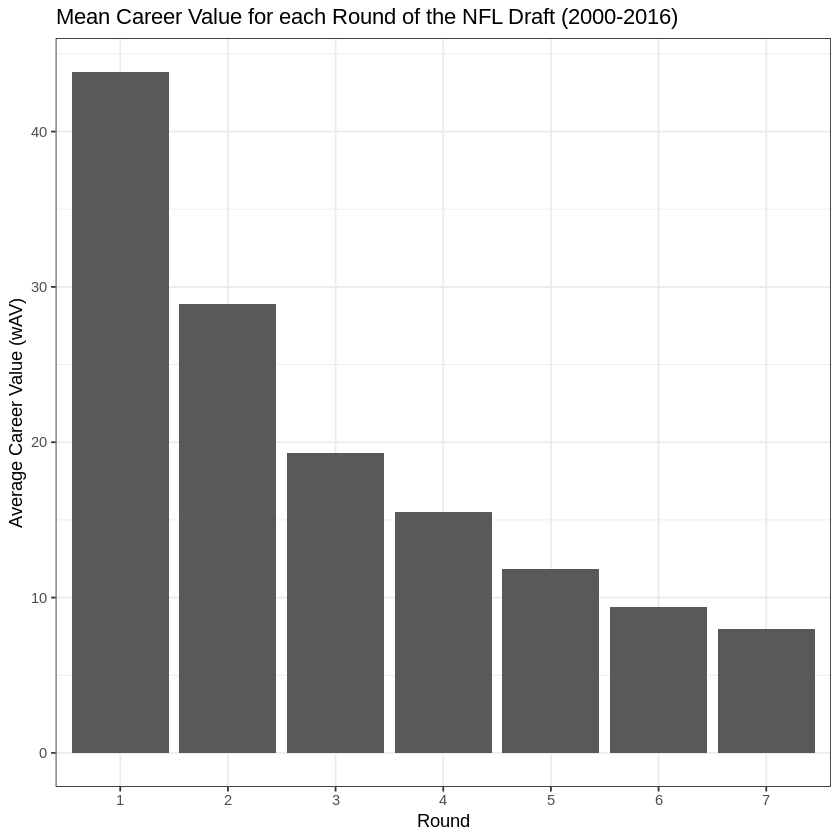

In [ ]:
# Round vs wAV
player_table |>
  group_by(Rnd) |>
  summarise(Avg_wAV = mean(wAV, na.rm = TRUE)) |>
  ggplot(aes(x = Rnd, y = Avg_wAV)) +
    geom_col() +
    theme_bw() +
    xlab("Round") +
    ylab("Average Career Value (wAV)") +
    labs(title = "Mean Career Value for each Round of the NFL Draft (2000-2016)")

player_table |>
  group_by(Rnd) |>
  summarise(Avg_wAV = mean(wAV, na.rm = TRUE))

Clear correlation between round a player is drafted in and their total career value (wAV). The largest drop-off is between the first and second round. The differnce between average wAV for rounds decreases in later rounds.

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


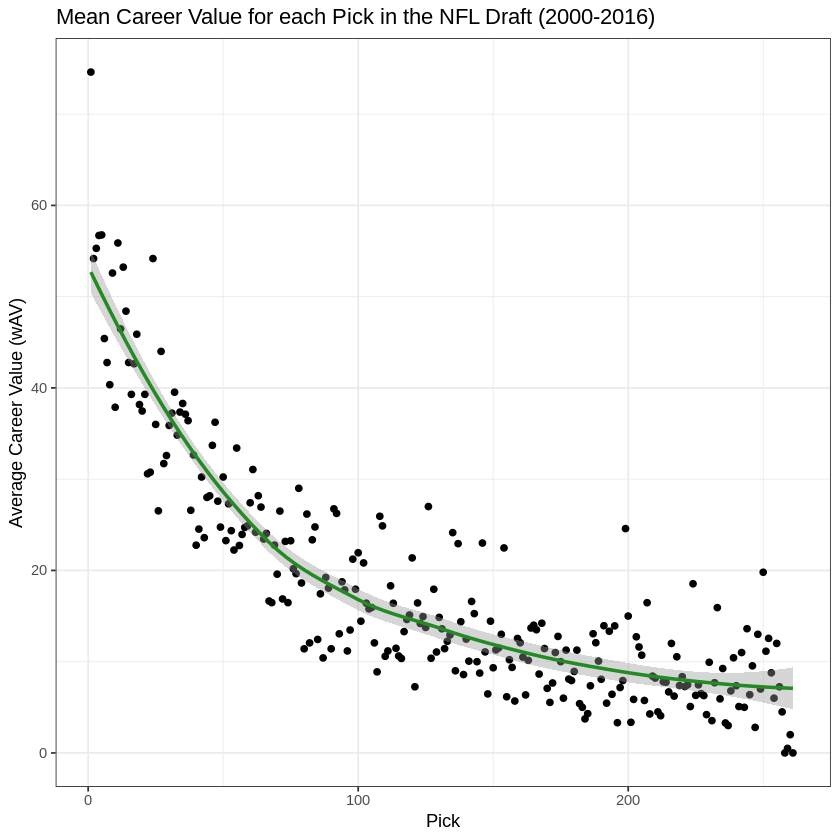

In [ ]:
# Pick vs wAV
player_table |>
  group_by(Pick) |>
  summarise(Avg_wAV = mean(wAV, na.rm = TRUE)) |>
  ggplot(aes(x = Pick, y = Avg_wAV)) +
    geom_point() +
    geom_smooth(formula = y~x, method = 'loess', color = "forestgreen") +
    theme_bw() +
    xlab("Pick") +
    ylab("Average Career Value (wAV)") +
    labs(title = "Mean Career Value for each Pick in the NFL Draft (2000-2016)")

Same pattern observed in the Round vs wAV graph. Later picks have a lower wAV on average.

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_col()`).”


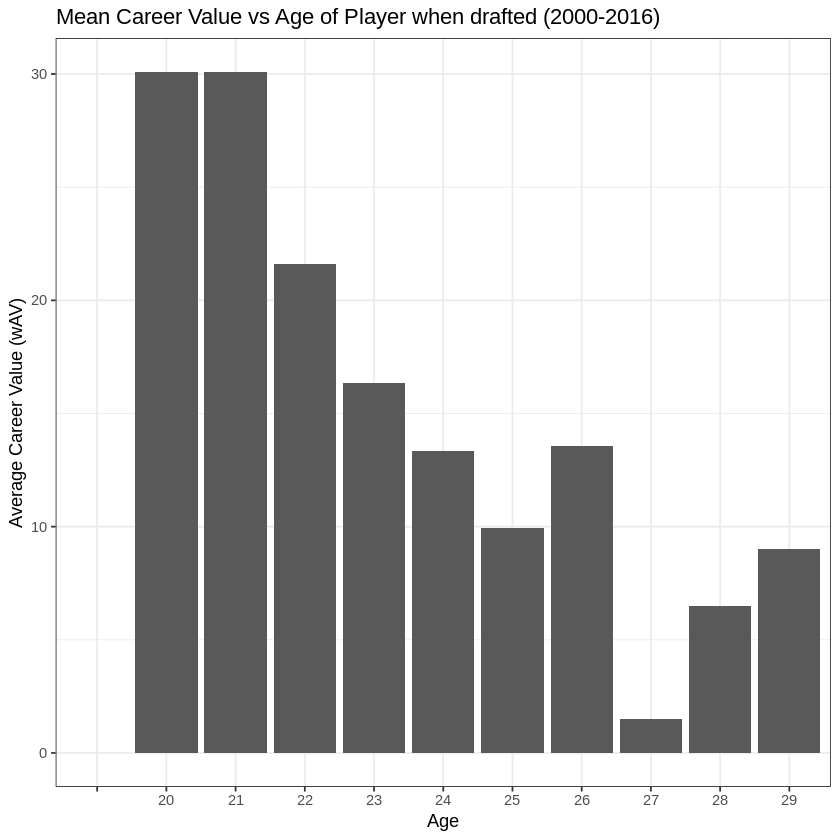

In [ ]:
# Age vs wAV
player_table |>
  group_by(Age) |>
  summarise(Avg_wAV = mean(wAV, na.rm = TRUE)) |>
  ggplot(aes(x = Age, y = Avg_wAV)) +
    geom_col() +
    theme_bw() +
    xlab("Age") +
    ylab("Average Career Value (wAV)") +
    labs(title = "Mean Career Value vs Age of Player when drafted (2000-2016)")


Players drafted younger tend to have higher wAV values than players drfted when they are older. Could be because they can play more years.

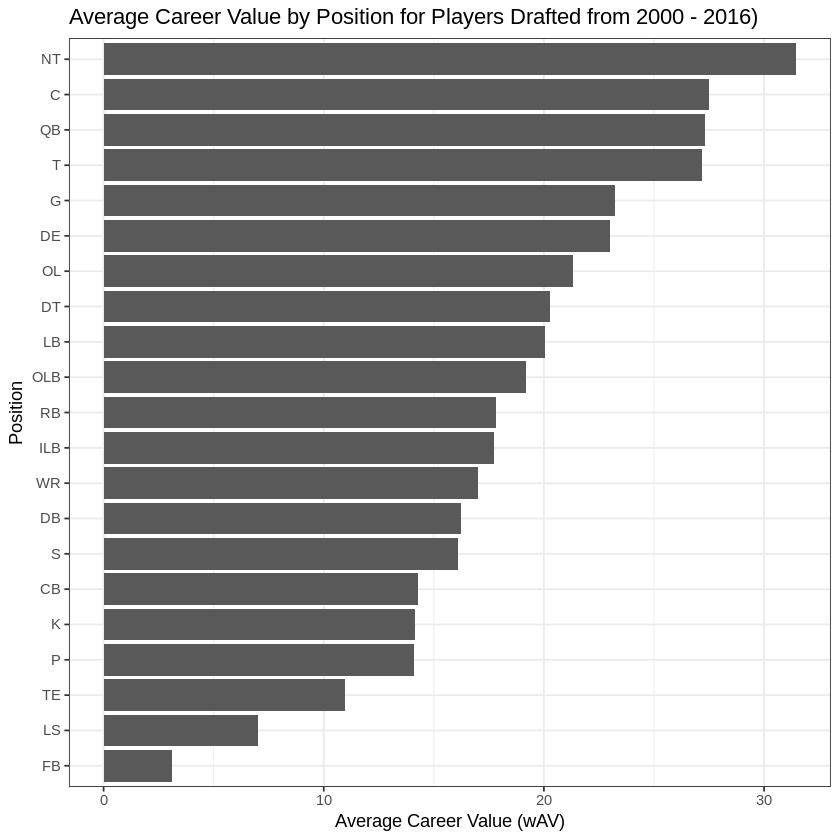

In [ ]:
# Position vs wAV
player_table |>
  group_by(Pos) |>
  summarise(Avg_wAV = mean(wAV, na.rm = TRUE)) |>
  filter(Pos != 'DL') |>
  ggplot(aes(reorder(Pos, Avg_wAV), Avg_wAV)) +
    geom_col() +
    theme_bw() +
    coord_flip() +
    xlab('Position') +
    ylab('Average Career Value (wAV)') +
    labs(title = 'Average Career Value by Position for Players Drafted from 2000 - 2016)')

### Wide Reciever Plots

In [ ]:
options(repr.plot.width = 18, repr.plot.height = 8)

Warning message:
“Removed 132 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 132 rows containing missing values or values outside the scale range
(`geom_point()`).”


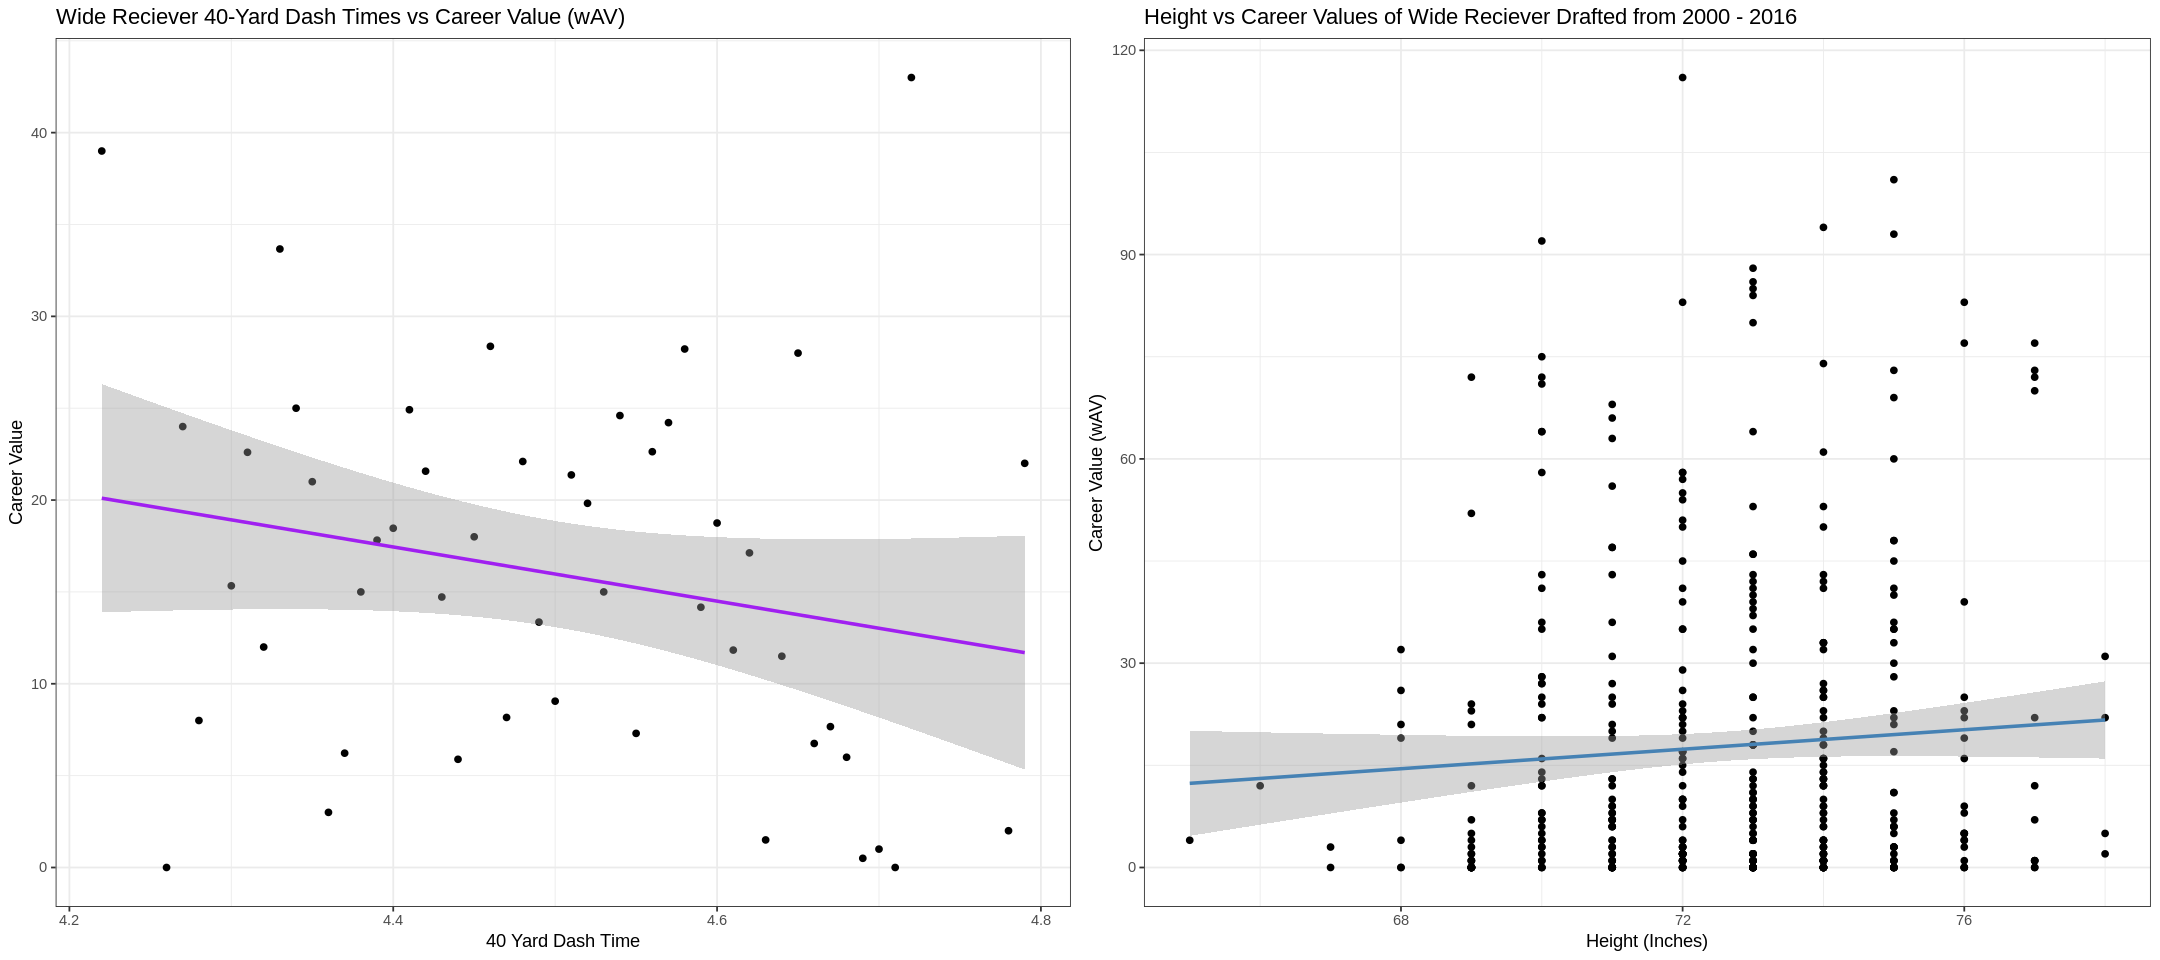

In [ ]:
# WR Plots

# 40 times vs wAV
plot1 <- player_table |>
  filter(Pos == 'WR' & !is.na(X40yd)) |>
  group_by(X40yd) |>
  summarise(Avg_wAV = mean(wAV, na.rm = TRUE)) |>
  ggplot(aes(x = X40yd, y = Avg_wAV)) +
    geom_point() +
    geom_smooth(formula = 'y~x', method = 'lm', color = "purple") +
    theme_bw() +
    xlab("40 Yard Dash Time") +
    ylab("Career Value") +
    labs(title = "Wide Reciever 40-Yard Dash Times vs Career Value (wAV)")

# Height vs wAV
plot2 <- player_table |>
  filter(Pos == 'WR') |>
  ggplot(aes(x = Ht_Inches, y = wAV)) +
    geom_point() +
    geom_smooth(method = "lm", formula = "y~x", color = "steelblue") +
    theme_bw() +
    xlab("Height (Inches)") +
    ylab("Career Value (wAV)") +
    labs(title = "Height vs Career Values of Wide Reciever Drafted from 2000 - 2016")

grid.arrange(plot1, plot2, ncol = 2)

Negative correlation between wAV and 40 Yard Dash time is observed. Positive correlation between height and wAV is observed. Neither correlation is super strong, but there is slight correlation.

## Modeling

In [ ]:
install.packages('caret')
install.packages('pROC')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘clock’, ‘gower’, ‘hardhat’, ‘recipes’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(caret)
library(pROC)

Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:Metrics’:

    precision, recall


The following object is masked from ‘package:purrr’:

    lift


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following object is masked from ‘package:Metrics’:

    auc


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [ ]:
# Filter Data to only include WR
wide_receiver <- player_table |>
  filter(Pos == 'WR' & !is.na(X40yd) & !is.na(Ht_Inches))

#Split the Data
split_index2 <- sample(1:nrow(wide_receiver), nrow(wide_receiver) * .70)
train2 <- wide_receiver[split_index2,]
test2 <- wide_receiver[-split_index2,]

In [ ]:
# Logistic Regression Model to Predict if the Player has an above average career
logModel <- glm(
  Above_Avg_Career ~ Pick + Ht_Inches + X40yd,
  data = train2,
  family = 'binomial'
)

summary(logModel)


Call:
glm(formula = Above_Avg_Career ~ Pick + Ht_Inches + X40yd, family = "binomial", 
    data = train2)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.884495   7.167874  -1.239    0.215    
Pick        -0.016469   0.002497  -6.597 4.21e-11 ***
Ht_Inches   -0.005249   0.063998  -0.082    0.935    
X40yd        2.288962   1.481273   1.545    0.122    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 378.72  on 292  degrees of freedom
Residual deviance: 317.68  on 289  degrees of freedom
  (31 observations deleted due to missingness)
AIC: 325.68

Number of Fisher Scoring iterations: 4


## Analysis

In [ ]:
# Add Predictions to the test set
test2 <- test2 |>
  mutate(Predictions = predict(logModel, test2),
         Classified_Predictions = ifelse(Predictions > 0.5, 1, 0))

In [ ]:
# Confusion Matrix
confusionMatrix(factor(test2$Above_Avg_Career), factor(test2$Classified_Predictions))

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 77  3
         1 36 12
                                          
               Accuracy : 0.6953          
                 95% CI : (0.6078, 0.7735)
    No Information Rate : 0.8828          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2464          
                                          
 Mcnemar's Test P-Value : 2.99e-07        
                                          
            Sensitivity : 0.6814          
            Specificity : 0.8000          
         Pos Pred Value : 0.9625          
         Neg Pred Value : 0.2500          
             Prevalence : 0.8828          
         Detection Rate : 0.6016          
   Detection Prevalence : 0.6250          
      Balanced Accuracy : 0.7407          
                                          
       'Positive' Class : 0               
                                    

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



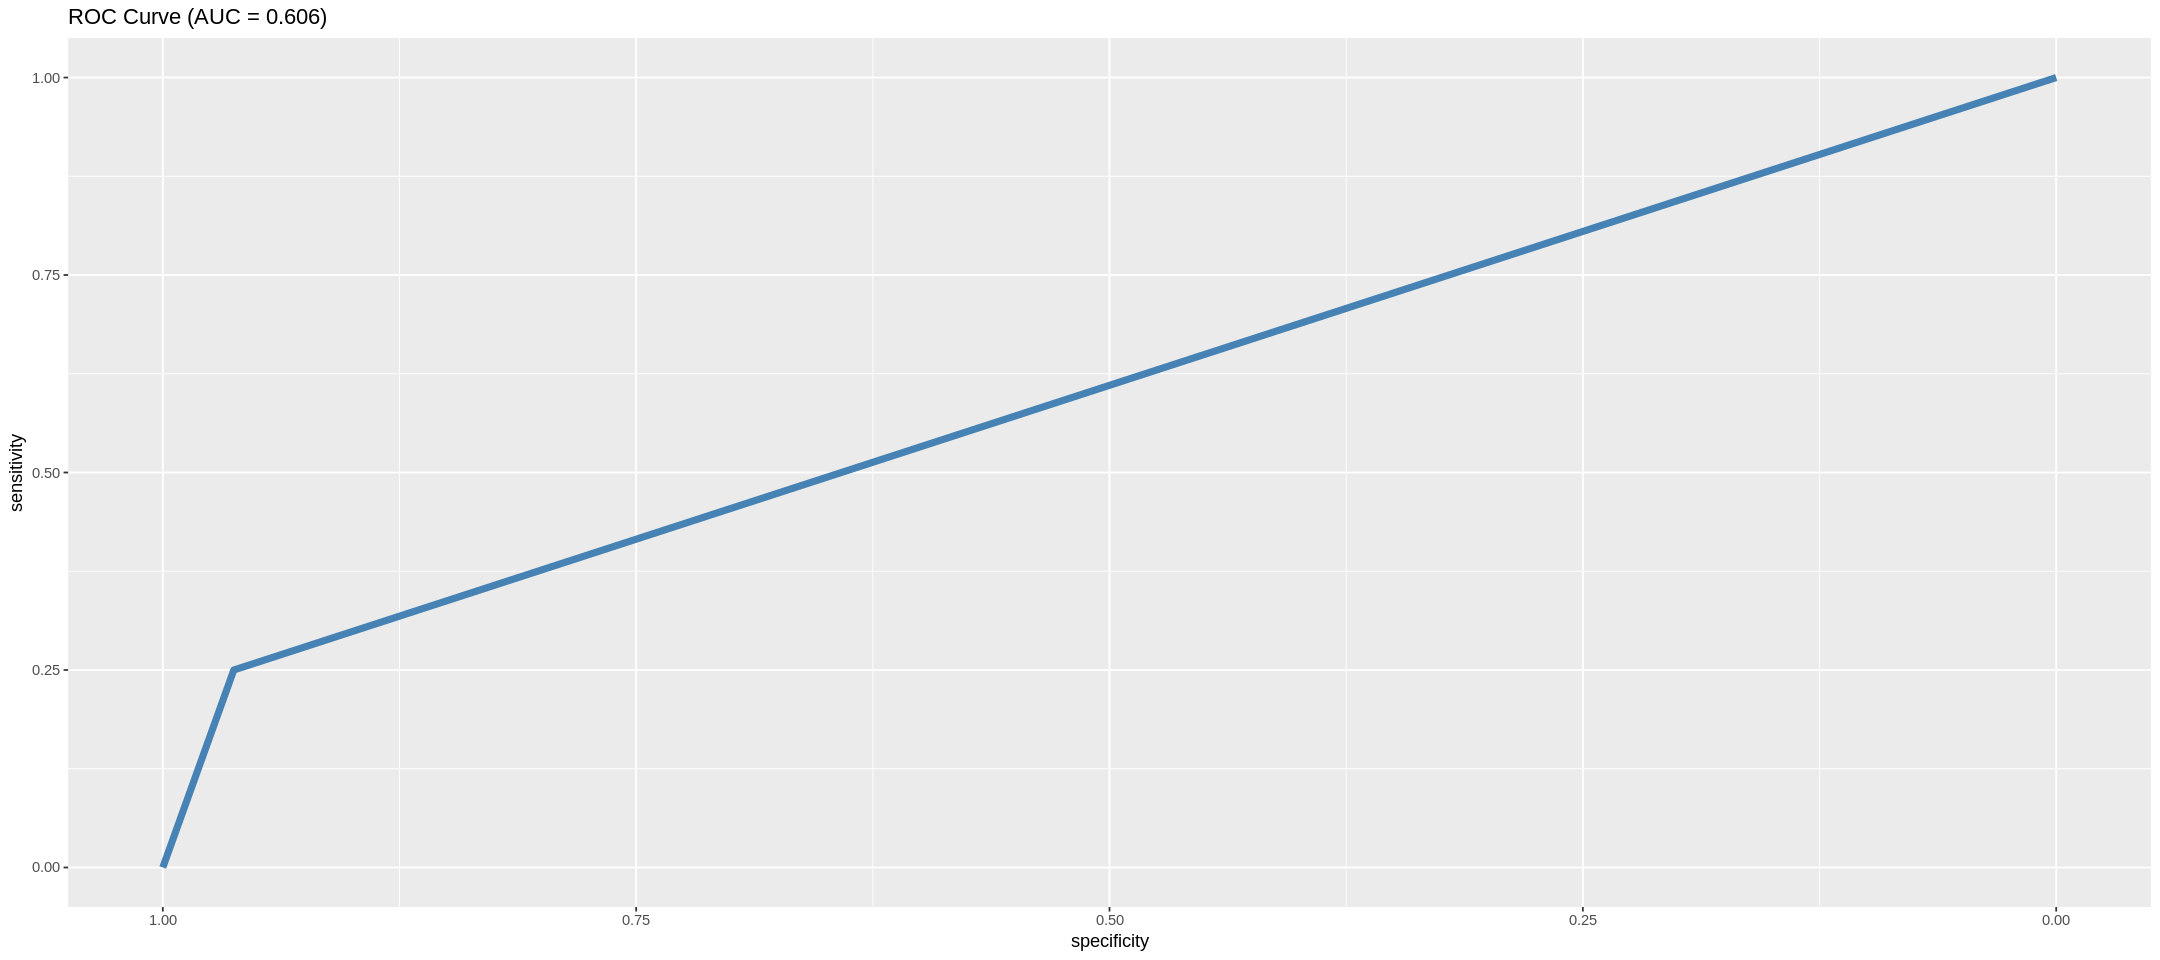

In [ ]:
ROC <- roc(test2$Above_Avg_Career, test2$Classified_Predictions)
AUC <- round(auc(test2$Above_Avg_Career, test2$Classified_Predictions),3)

ggroc(ROC, colour = 'steelblue', size = 2) +
  ggtitle(paste0('ROC Curve ', '(AUC = ', AUC, ')'))

## Summary


<p align = 'justify'>This model that attempts to break to if a wide receiver will have an "above average" career preforms decently. With an overall accuracy of 0.70 on test data, the model can predict whether a player will have an above average career almost three quarters of the time. With a specificity rate of 0.68 and a sensitivity rate of 0.8, my model is over-omptimistic, and tends to over predict players having an above average career. </p>


<p align = 'justify'>The model includes three predictor values: Pick, the player's height in inches, and the player's 40 yard dash time. Pick was deemed the most important predictor, followed by 40 time and height. Height was not found to be a significant predictor of career success. 40 yard dash time was technically not significant using the .05 significance level, but if we used a 0.1 significance level, 40 yard dash time would be very close to being considered significant. </p>


<p align = 'justify'>To summarize, the greatest predictor in WR success is the pick at which they were taken. While there are certainly exceptions, Wide outs taken earlier in the draft tend to have more successful careers than those taken in later rounds. Faster 40 yard dash times also tends to lead to a more successful career. I would've liked to see how other athletic metrics affect career value (wAV), but there are so many players with missing values that it didn't seem feasible to include these in a model.</p>